## 0. 필요한 라이브러리 import 하기

In [1]:
from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


## 1. Train 데이터 불러오기 및 Resize 하기

In [2]:
img_size = 28
color = 3
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 img_size x img_size 사이즈로 바꾸어 저장합니다.
	target_size=(img_size,img_size)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

500  images to be resized.
500  images resized.
가위 이미지 resize 완료!


#### 이미지 크기 확인하기

In [3]:
image_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
# image_path = os.getenv("HOME") + "/aiffel/03.Exploration/Ex05/scissor"
img00 = Image.open(image_path + "/0.jpg")
img00.size

(28, 28)

In [4]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
images=glob.glob(image_path + "/*.jpg")

# 파일마다 모두 img_size x img_size 사이즈로 바꾸어 저장합니다.
target_size=(img_size,img_size)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img, "JPEG")

print(len(images), "바위 images resized.")

500 바위 images resized.


In [5]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
images=glob.glob(image_path + "/*.jpg")

# 파일마다 모두 img_size x img_size 사이즈로 바꾸어 저장합니다.
target_size=(img_size,img_size)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img, "JPEG")

print(len(images), "보 images resized.")

500 보 images resized.


## 2. 가위: 0, 바위: 1, 보: 2 로 라벨링 하고 정규화 하기

### Train data 라벨링 하기

In [7]:
import numpy as np

def load_data(img_path, number_of_data=1500):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,
                  dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 1500 입니다.
x_train shape: (1500, 28, 28, 3)
y_train shape: (1500,)


### 이미지 프린팅 해보기

라벨:  0


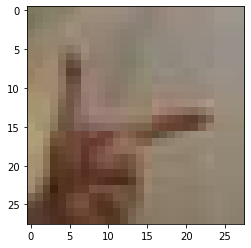

In [8]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

### Test data resize 하기

In [9]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
images=glob.glob(image_path + "/*.jpg")

# 파일마다 모두 img_size x img_size 사이즈로 바꾸어 저장합니다.
target_size=(img_size,img_size)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img, "JPEG")

print(len(images), " images resized.")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
images=glob.glob(image_path + "/*.jpg")

# 파일마다 모두 img_size x img_size 사이즈로 바꾸어 저장합니다.
target_size=(img_size,img_size)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img, "JPEG")

print(len(images), " images resized.")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
images=glob.glob(image_path + "/*.jpg")

# 파일마다 모두 img_size x img_size사이즈로 바꾸어 저장합니다.
target_size=(img_size,img_size)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img, "JPEG")

print(len(images), " images resized.")

100  images resized.
100  images resized.
100  images resized.


## 3. 딥러닝 네트워크 설계하기
Train data labeling 및 네트워크 모델링 하기

In [19]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from PIL import Image
import glob
import os

def load_data(img_path, number_of_data=1500):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,
                  dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    if img_path[-5:] == 'paper':
        print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    else:
        print("테스트데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

train_data_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(train_data_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

# 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_train_reshaped=x_train_norm.reshape( -1, img_size, img_size, color)

# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=32
n_channel_2=64
n_channel_3 = 64
n_dense=128
n_train_epoch=20

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(img_size,img_size,color)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(n_channel_3, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

학습데이터(x_train)의 이미지 개수는 1500 입니다.
x_train shape: (1500, 28, 28, 3)
y_train shape: (1500,)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 1, 1, 64)          0         
______________________________

## 4. 딥러닝 네트워크 학습시키기

In [20]:
# 모델 훈련
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

Epoch 1/20
47/47 [==============================] - 1s 6ms/step - loss: 1.2980 - accuracy: 0.3327
Epoch 2/20
47/47 [==============================] - 0s 3ms/step - loss: 1.1078 - accuracy: 0.3533
Epoch 3/20
47/47 [==============================] - 0s 3ms/step - loss: 1.0597 - accuracy: 0.4433
Epoch 4/20
47/47 [==============================] - 0s 3ms/step - loss: 0.9876 - accuracy: 0.5160
Epoch 5/20
47/47 [==============================] - 0s 3ms/step - loss: 0.8318 - accuracy: 0.6173
Epoch 6/20
47/47 [==============================] - 0s 3ms/step - loss: 0.6262 - accuracy: 0.7533
Epoch 7/20
47/47 [==============================] - 0s 3ms/step - loss: 0.4991 - accuracy: 0.7980
Epoch 8/20
47/47 [==============================] - 0s 3ms/step - loss: 0.4038 - accuracy: 0.8367
Epoch 9/20
47/47 [==============================] - 0s 3ms/step - loss: 0.3271 - accuracy: 0.8713
Epoch 10/20
47/47 [==============================] - 0s 3ms/step - loss: 0.2798 - accuracy: 0.8987
Epoch 11/20
47/47 [

## 5. 얼마나 잘 만들었는지 확인하기(테스트)
Test data 만들기

In [21]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
test_data_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(test_data_path)
print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

# 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, img_size, img_size, color)

테스트데이터(x_test)의 이미지 개수는 300 입니다.
x_test shape: (1500, 28, 28, 3)
y_test shape: (1500,)


#### Loss 및 Accuracy 측정하기

In [22]:
# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

47/47 - 0s - loss: 1.3147 - accuracy: 0.8820
test_loss: 1.314746379852295 
test_accuracy: 0.8820000290870667


#### Loss 값이 크고 Accuracy 값이 너무 작다.
라이퍼 파라미터값을 변경시켜봐도 좀처럼 나아지지 않는다.(Loss: 4.46, Accuracy: 0.40)

Channel수를 3개로 늘려보니 조금 나아졌다.(Loss: 3.08, Accuracy: 0.47)

데이터 양이 너무 적은것이 하나의 원인일것으로 생각되어 기존 100개씩에서 400개씩을 더해 총 500개로 해 보았다.

결과가 많이 향상되었다. (Loss: 1.31, Accuracy: 0.88)